<h1><b>Title:</b> Linear Regression vs Polynomial Regression 📈</h1>
<h3><b>Goal🎯:</b> Find which model works best without overfitting using Advertising dataset.</h3>

<h3>____________________________________________________________________________________________________________________________</h3>

<h3>Lets start with importing the libraries and loading the dataset</h3>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
advertising_df = pd.read_csv('Advertising.csv')
df = advertising_df.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<h3>Lets check if the data is clean before we start the comparison.</h3>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

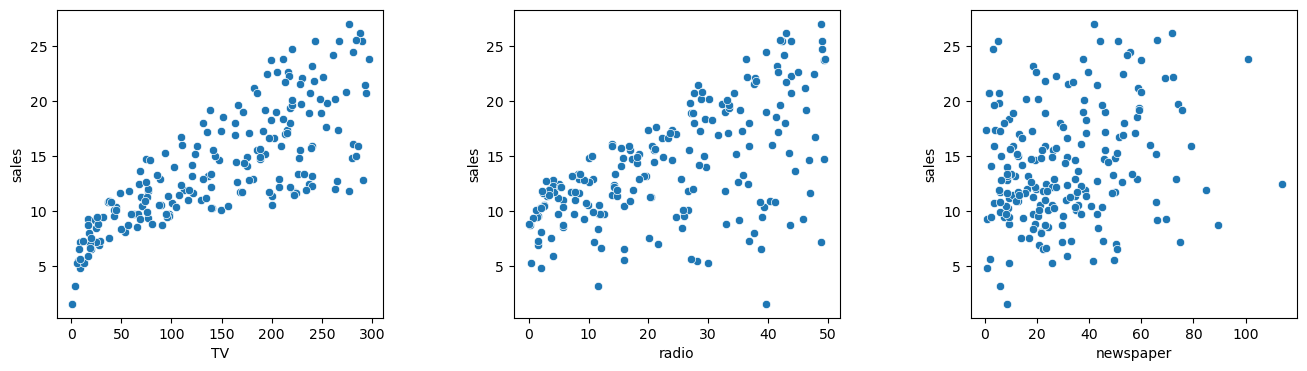

In [25]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='TV',y='sales')

plt.subplot(1,3,2)
sns.scatterplot(data=df,x='radio',y='sales')

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='newspaper',y='sales')

plt.subplots_adjust(wspace=0.4,hspace=0.4)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<h3>The data is cleaned where there is no null-values nor zero values that doesnt make any sense.</h3>

<h3>____________________________________________________________________________________________________________________________</h3>

<h3>It is time to train the models.</h3>

In [27]:
X = df.drop('sales',axis=1)
y = df['sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<h3>First, lets start with Linear Regression.</h3>

In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
test_prediction = lr_model.predict(X_test)

<h3>I want to visualize using residual plot to make sure that Linear Regression can be used in this dataset.</h3>

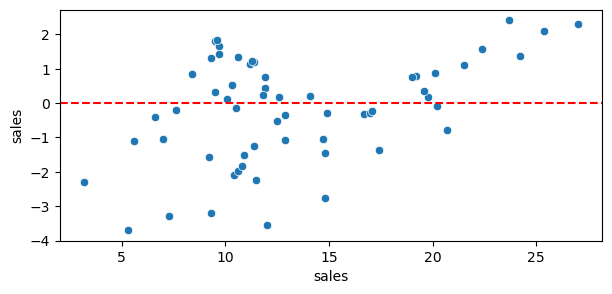

In [31]:
test_residuals = y_test - test_prediction
plt.figure(figsize=(7,3))
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

<h3>Now it is time for Polynomial Regression.</h3>

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<h3>Im going to use for loop to check which degree is the best to use.</h3>

In [33]:
from sklearn.metrics import r2_score, root_mean_squared_error
train_rmse_errors = []
test_rmse_errore = []
train_r_errors = []
test_r_errors = []

for i in range(1,10):
    poly_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    pr_model = LinearRegression()
    pr_model.fit(X_train,y_train)
    train_pred = pr_model.predict(X_train)
    test_pred = pr_model.predict(X_test)
    train_rmse = root_mean_squared_error(y_train,train_pred).round(2)
    test_rmse = root_mean_squared_error(y_test,test_pred).round(2)
    train_r = round(r2_score(y_train,train_pred),2)
    test_r = round(r2_score(y_test,test_pred),2)
    train_rmse_errors.append(train_rmse)
    test_rmse_errore.append(test_rmse)
    train_r_errors.append(train_r)
    test_r_errors.append(test_r)
    print(f'Train RMSE for degree {i}: {train_rmse}')
    print(f'Test RMSE for degree {i}: {test_rmse}')
    print(f'Train R^2 for degree {i}: {train_r}')
    print(f'Test R^2 for degree {i}: {test_r}')
    print()

Train RMSE for degree 1: 1.73
Test RMSE for degree 1: 1.52
Train R^2 for degree 1: 0.89
Test R^2 for degree 1: 0.92

Train RMSE for degree 2: 0.59
Test RMSE for degree 2: 0.66
Train R^2 for degree 2: 0.99
Test R^2 for degree 2: 0.98

Train RMSE for degree 3: 0.43
Test RMSE for degree 3: 0.58
Train R^2 for degree 3: 0.99
Test R^2 for degree 3: 0.99

Train RMSE for degree 4: 0.35
Test RMSE for degree 4: 0.51
Train R^2 for degree 4: 1.0
Test R^2 for degree 4: 0.99

Train RMSE for degree 5: 0.25
Test RMSE for degree 5: 2.58
Train R^2 for degree 5: 1.0
Test R^2 for degree 5: 0.76

Train RMSE for degree 6: 0.19
Test RMSE for degree 6: 7.23
Train R^2 for degree 6: 1.0
Test R^2 for degree 6: -0.85

Train RMSE for degree 7: 0.11
Test RMSE for degree 7: 113.15
Train R^2 for degree 7: 1.0
Test R^2 for degree 7: -452.45

Train RMSE for degree 8: 0.0
Test RMSE for degree 8: 1396.85
Train R^2 for degree 8: 1.0
Test R^2 for degree 8: -69110.83

Train RMSE for degree 9: 0.0
Test RMSE for degree 9: 234

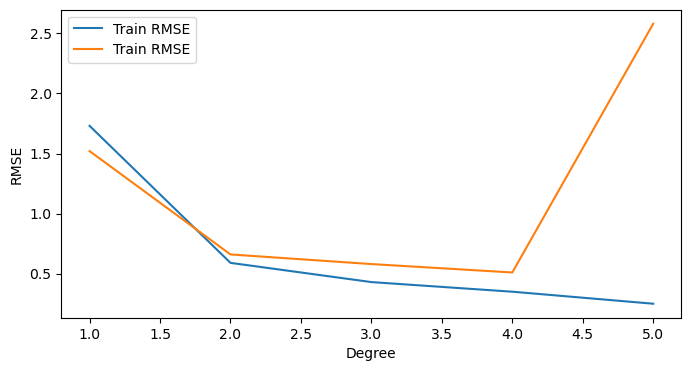

In [34]:
plt.figure(figsize=(8,4))
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE')
plt.plot(range(1,6),test_rmse_errore[:5],label='Train RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<h3>From the results. I decided to use the 3rd degree since it gave us the best results while not being overfit.</h3>

In [35]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = final_poly_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
final_pr_model = LinearRegression()
final_pr_model.fit(X_train,y_train)
final_pr_pred = final_pr_model.predict(X_test)

<h3>If we are still not sure if we have overfitting, lets use regularizations to prevent from overfitting. I will strt with Ridge Regression with Cross Validation to give us the best alpha to use.</h3>

In [36]:
from sklearn.linear_model import RidgeCV
# help(RidgeCV)
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),cv=10,)
ridge_cv_model.fit(X_train,y_train)
ridge_cv_pred_values = ridge_cv_model.predict(X_test)

In [37]:
poly_converter.get_feature_names_out()[0:19]

array(['TV', 'radio', 'newspaper', 'TV^2', 'TV radio', 'TV newspaper',
       'radio^2', 'radio newspaper', 'newspaper^2', 'TV^3', 'TV^2 radio',
       'TV^2 newspaper', 'TV radio^2', 'TV radio newspaper',
       'TV newspaper^2', 'radio^3', 'radio^2 newspaper',
       'radio newspaper^2', 'newspaper^3'], dtype=object)

In [38]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

<h3>The other regularization to use is the Lasso Regression with Cross Validation.</h3>

In [39]:
from sklearn.linear_model import LassoCV
# help(LassoCV)
lasso_cv_model = LassoCV(cv=10,eps=0.001,n_alphas=100,max_iter=1000000)
lasso_cv_model.fit(X_train,y_train)
lasso_pred = lasso_cv_model.predict(X_test)

In [40]:
poly_converter.get_feature_names_out()[0:19]

array(['TV', 'radio', 'newspaper', 'TV^2', 'TV radio', 'TV newspaper',
       'radio^2', 'radio newspaper', 'newspaper^2', 'TV^3', 'TV^2 radio',
       'TV^2 newspaper', 'TV radio^2', 'TV radio newspaper',
       'TV newspaper^2', 'radio^3', 'radio^2 newspaper',
       'radio newspaper^2', 'newspaper^3'], dtype=object)

In [41]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

<h3>Last one is Elastic-Net, which is mix between Ridge and Lasso Regressions.</h3>

In [42]:
from sklearn.linear_model import ElasticNetCV
elastic_cv_model = ElasticNetCV(l1_ratio=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1],eps=0.001,cv=10,n_alphas=100,max_iter=1000000)
elastic_cv_model.fit(X_train,y_train)
elastic_pred = elastic_cv_model.predict(X_test)

In [43]:
elastic_cv_model.l1_ratio_

1.0

In [44]:
poly_converter.get_feature_names_out()[0:19]

array(['TV', 'radio', 'newspaper', 'TV^2', 'TV radio', 'TV newspaper',
       'radio^2', 'radio newspaper', 'newspaper^2', 'TV^3', 'TV^2 radio',
       'TV^2 newspaper', 'TV radio^2', 'TV radio newspaper',
       'TV newspaper^2', 'radio^3', 'radio^2 newspaper',
       'radio newspaper^2', 'newspaper^3'], dtype=object)

In [45]:
elastic_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

<h3>____________________________________________________________________________________________________________________________</h3>

<h3>Lastly, it is time to evaluate the models.</h3>

In [46]:
print('Linear Regression:')
print(f'RMSE: {root_mean_squared_error(y_test,test_prediction).round(2)}')
print(f'R^2: {round(r2_score(y_test,test_prediction),2)}')
print()
print('Polynomial Regression, Degree 3:')
print(f'RMSE: {root_mean_squared_error(y_test,final_pr_pred).round(2)}')
print(f'R^2: {round(r2_score(y_test,final_pr_pred),2)}')
print()
print('Ridge CV Regression:')
print(f'RMSE: {root_mean_squared_error(y_test,ridge_cv_pred_values).round(2)}')
print(f'R^2: {round(r2_score(y_test,ridge_cv_pred_values),2)}')
print()
print('Lasso CV Regression:')
print(f'RMSE: {root_mean_squared_error(y_test,lasso_pred).round(2)}')
print(f'R^2: {round(r2_score(y_test,lasso_pred),2)}')
print()
print('Elastic-Net CV Regression:')
print(f'RMSE: {root_mean_squared_error(y_test,elastic_pred).round(2)}')
print(f'R^2: {round(r2_score(y_test,elastic_pred),2)}')

Linear Regression:
RMSE: 1.52
R^2: 0.92

Polynomial Regression, Degree 3:
RMSE: 0.58
R^2: 0.99

Ridge CV Regression:
RMSE: 0.62
R^2: 0.99

Lasso CV Regression:
RMSE: 0.61
R^2: 0.99

Elastic-Net CV Regression:
RMSE: 0.61
R^2: 0.99


In [47]:
model_predictions_check = pd.DataFrame({'y_test':y_test,
                                        'Linear Regression':test_prediction.round(2),
                                        '3rd-Polynomial':final_pr_pred.round(2),
                                        'Ridge Regression':ridge_cv_pred_values.round(2),
                                        'Lasso Regression':lasso_pred.round(2),
                                        'Elastic-Net Regression':elastic_pred.round(2)})
model_predictions_check

,y_test,Linear Regression,3rd-Polynomial,Ridge Regression,Lasso Regression,Elastic-Net Regression
37,14.7,15.74,14.62,14.25,14.16,14.16
109,19.8,19.61,19.06,19.10,19.29,19.29
31,11.9,11.45,12.61,12.45,12.34,12.34
89,16.7,17.01,17.29,17.07,16.98,16.98
66,9.5,9.17,7.79,7.94,8.02,8.02
119,6.6,7.01,6.82,7.10,6.96,6.96
54,20.2,20.29,19.96,19.95,20.12,20.12
74,17.0,17.30,17.13,17.25,17.33,17.33
145,10.3,9.78,10.40,10.34,10.43,10.43
142,20.1,19.22,19.71,19.86,19.96,19.96


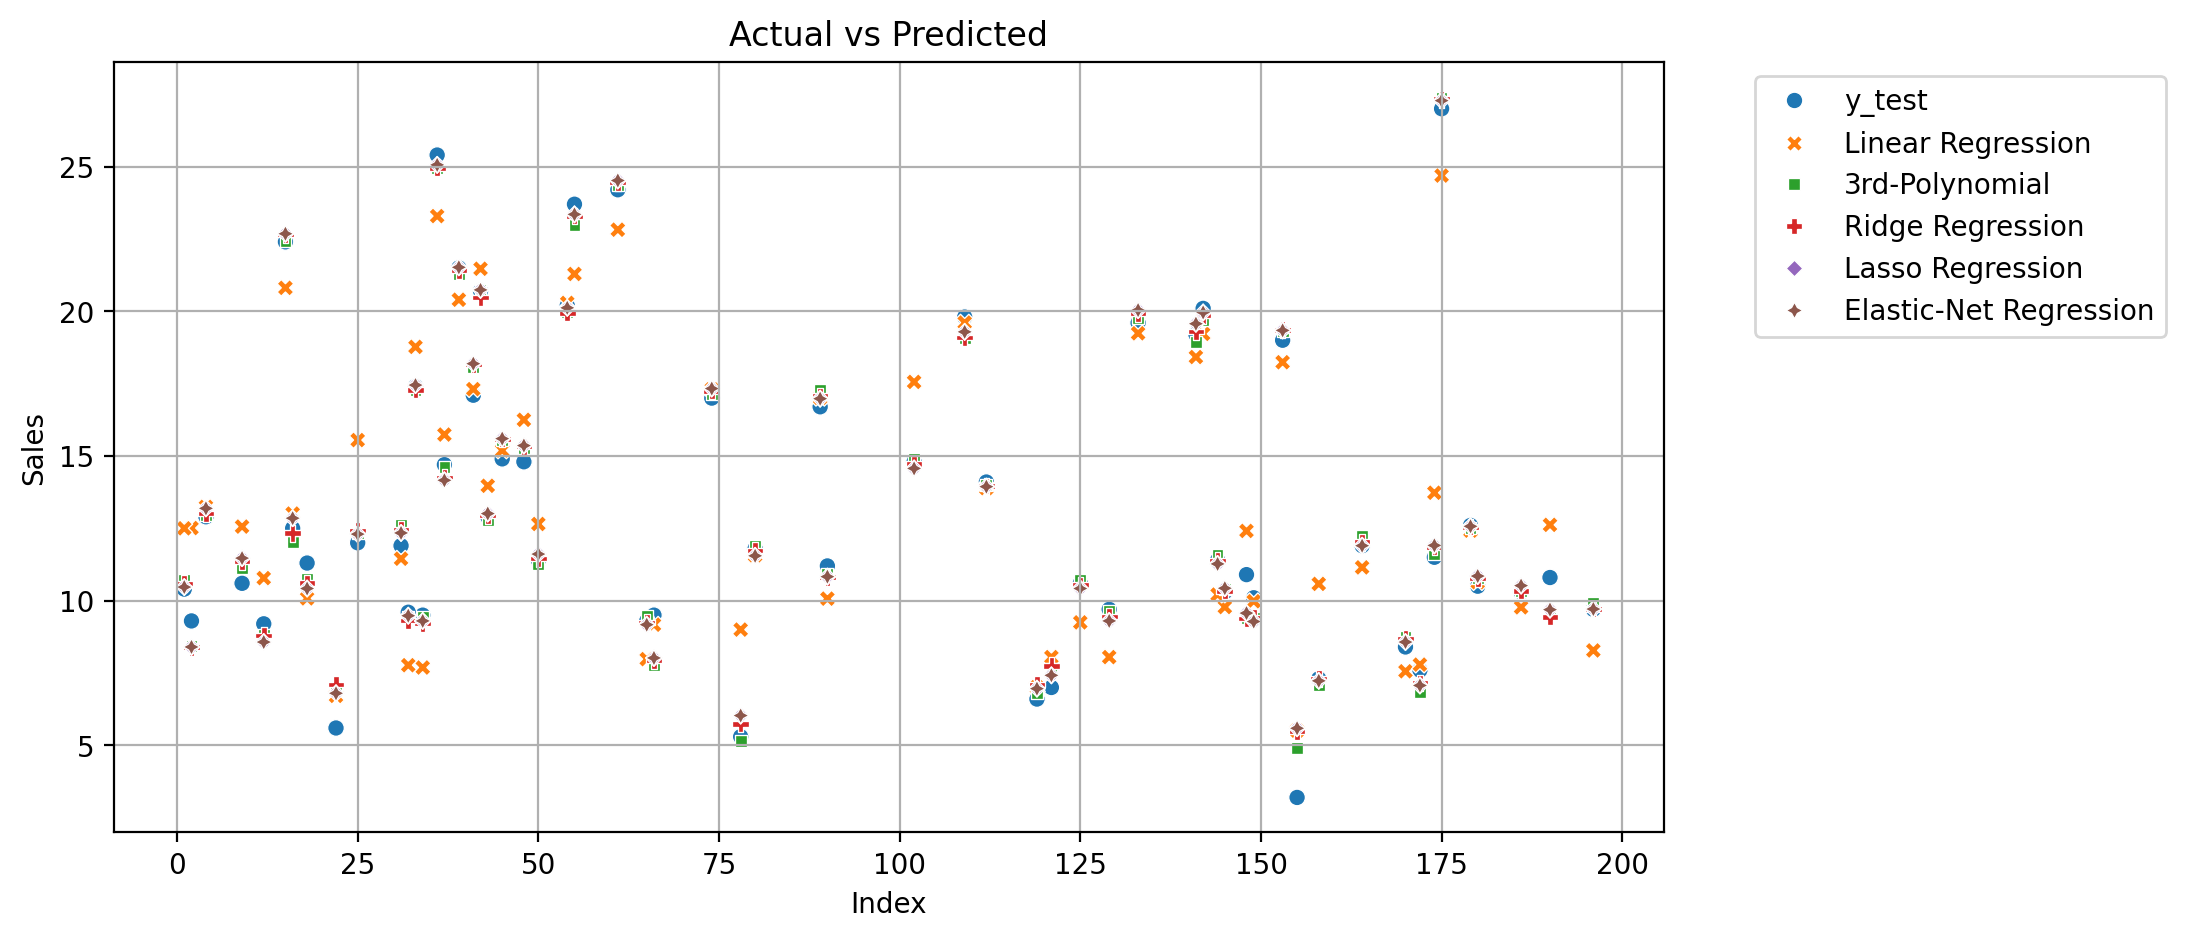

In [48]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=model_predictions_check)
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05,1))
plt.grid(True)
plt.show()

<h3>From the results, we can understand that Polynomial Regression performed better, and there wasnt overfitting since the results of Polyonial Regression and Regularizations are so close to each other.</h3>